In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2023-04-06 20:31:03.297565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 20:31:03.538198: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-06 20:31:03.538228: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-06 20:31:04.679994: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Specify each path

In [166]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [167]:
NUM_CLASSES = 7

# Dataset reading

In [193]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [194]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building MLP

In [190]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [191]:
model_1.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_30 (Dropout)        (None, 42)                0         
                                                                 
 dense_81 (Dense)            (None, 20)                860       
                                                                 
 dropout_31 (Dropout)        (None, 20)                0         
                                                                 
 dense_82 (Dense)            (None, 10)                210       
                                                                 
 dense_83 (Dense)            (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [158]:
# Model compilation
model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model building CNN

In [147]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(42, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [148]:
model_2.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 40, 32)            128       
                                                                 
 max_pooling1d_34 (MaxPoolin  (None, 20, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_52 (Conv1D)          (None, 18, 64)            6208      
                                                                 
 max_pooling1d_35 (MaxPoolin  (None, 9, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_53 (Conv1D)          (None, 7, 64)             12352     
                                                                 
 flatten_17 (Flatten)        (None, 448)             

In [149]:
# Model compilation
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model building LSTM

In [180]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(42, input_shape=(42, 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [181]:
model_3.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 42)                7392      
                                                                 
 dropout_26 (Dropout)        (None, 42)                0         
                                                                 
 dense_75 (Dense)            (None, 20)                860       
                                                                 
 dropout_27 (Dropout)        (None, 20)                0         
                                                                 
 dense_76 (Dense)            (None, 10)                210       
                                                                 
 dense_77 (Dense)            (None, 7)                 77        
                                                                 
Total params: 8,539
Trainable params: 8,539
Non-train

In [182]:
# Model compilation
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model building MLP

In [ ]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(42, input_shape=(42, 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# CallBack

In [183]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# Model training

In [186]:
model_1.fit(
    X_train,
    y_train,
    epochs=10000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback],
)

Epoch 1/10000
 1/33 [..............................] - ETA: 0s - loss: 0.5890 - accuracy: 0.8203
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.7654 - val_loss: 0.3203 - val_accuracy: 0.9014
Epoch 2/10000
 1/33 [..............................] - ETA: 0s - loss: 0.6510 - accuracy: 0.7812
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.7586 - val_loss: 0.3430 - val_accuracy: 0.8928
Epoch 3/10000
 1/33 [..............................] - ETA: 0s - loss: 0.6409 - accuracy: 0.7578
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7683 - val_loss: 0.3246 - val_accuracy: 0.9058
Epoch 4/10000
 1/33 [..............................] - ETA: 0s - loss: 0.6073 - accuracy: 0.80

 1/33 [..............................] - ETA: 0s - loss: 0.7138 - accuracy: 0.7656
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.7681 - val_loss: 0.3402 - val_accuracy: 0.8848
Epoch 29/10000
 1/33 [..............................] - ETA: 0s - loss: 0.6942 - accuracy: 0.7578
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.7666 - val_loss: 0.3281 - val_accuracy: 0.8964
Epoch 30/10000
 1/33 [..............................] - ETA: 0s - loss: 0.5924 - accuracy: 0.7734
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7664 - val_loss: 0.3436 - val_accuracy: 0.8920
Epoch 31/10000
 1/33 [..............................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7969
Epoch

In [187]:
# Model evaluation
model = model_1
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8971


In [163]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [164]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 36ms/step
[3.6126648e-03 8.1917256e-01 1.7721476e-01 5.5073636e-18 6.9420900e-20
 1.9496808e-23 2.4059578e-21]
1


# Confusion matrix

44/44 [==============================] - 0s 740us/step


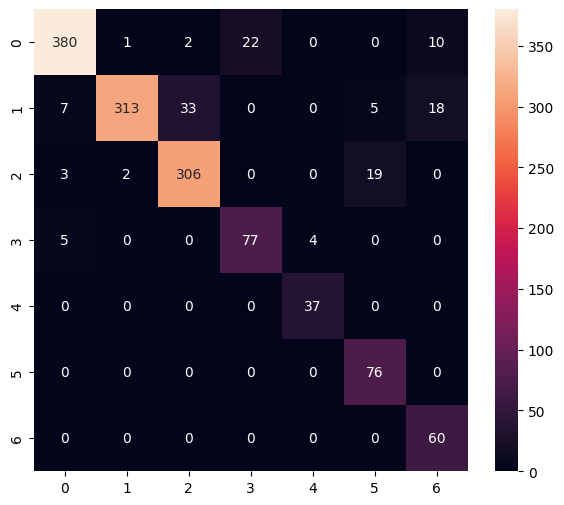

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       415
           1       0.99      0.83      0.90       376
           2       0.90      0.93      0.91       330
           3       0.78      0.90      0.83        86
           4       0.90      1.00      0.95        37
           5       0.76      1.00      0.86        76
           6       0.68      1.00      0.81        60

    accuracy                           0.91      1380
   macro avg       0.85      0.94      0.89      1380
weighted avg       0.92      0.91      0.91      1380



In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpiu9zeepn/assets


INFO:tensorflow:Assets written to: /tmp/tmpiu9zeepn/assets
2023-03-06 09:16:38.587560: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-06 09:16:38.587581: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-06 09:16:38.588131: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpiu9zeepn
2023-03-06 09:16:38.589249: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-06 09:16:38.589263: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpiu9zeepn
2023-03-06 09:16:38.593187: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-03-06 09:16:38.593938: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-03-06 09:16:38.625172: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

6704

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [50]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [51]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 37 µs, sys: 2 µs, total: 39 µs
Wall time: 45.3 µs


In [52]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6528351e-01 3.4601703e-02 2.3508295e-05 9.1302078e-05]
0
